<a href="https://colab.research.google.com/github/Shefali-sahu/Box-Office-Revenue-Prediction/blob/main/Box_Office_Revenue_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Box Office Revenue Prediction Using Linear Regression in ML

When a movie is produced, one of the key goals for the director and producers is to maximize box office revenue. In this project, we explore how machine learning can be used to predict a movie’s box office revenue based on its genre and other relevant features such as release date, number of theaters, runtime, and MPAA rating.

Importing Libraries and Dataset

Pandas - This library helps to load the data frame in a 2D array format and has multiple functions to perform analysis tasks in one go.

Numpy - Numpy arrays are very fast and can perform large computations in a very short time.

Matplotlib/Seaborn - This library is used to draw visualizations.

Sklearn - This module contains multiple libraries are having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation.

XGBoost - This contains the eXtreme Gradient Boosting machine learning algorithm which is one of the algorithms which helps us to achieve high accuracy on predictions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving boxoffice.csv to boxoffice.csv


In [3]:
df = pd.read_csv('boxoffice.csv',
                 encoding='latin-1')
df.head()

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
0,The Avengers,6026491,1274885664,Warner Bros.,163620146,253,174687337,R,Animation,16
1,Titanic,169411543,1132871091,Disney,85549990,122,103948486,G,Action,103
2,Jurassic Park,107836098,583329845,Sony,55681429,3826,122104991,NC-17,Horror,89
3,Avatar,51433697,1225323391,Disney,109775324,3868,46431596,G,Horror,85
4,The Lion King,142791649,604140729,Warner Bros.,59476800,2934,203513696,R,Comedy,158


In [4]:
df.shape

(2694, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             2694 non-null   object
 1   domestic_revenue  2694 non-null   int64 
 2   world_revenue     2694 non-null   int64 
 3   distributor       2694 non-null   object
 4   opening_revenue   2694 non-null   int64 
 5   opening_theaters  2694 non-null   int64 
 6   budget            2694 non-null   int64 
 7   MPAA              2694 non-null   object
 8   genres            2694 non-null   object
 9   release_days      2694 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 210.6+ KB


.T - This stands for transpose. It flips the rows and columns of the output from describe()

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
domestic_revenue,2694.0,1.508539e+08,8.579997e+07,827765.0,7.673272e+07,152572473.5,2.247314e+08,2.998107e+08
world_revenue,2694.0,7.719177e+08,4.284414e+08,3261301.0,3.991135e+08,766555142.5,1.143920e+09,1.499310e+09
opening_revenue,2694.0,9.971321e+07,5.721762e+07,138569.0,5.033848e+07,99814175.0,1.489805e+08,1.999336e+08
opening_theaters,2694.0,2.263039e+03,1.298559e+03,10.0,1.161000e+03,2271.5,3.392250e+03,4.499000e+03
budget,2694.0,1.537996e+08,8.557624e+07,5197977.0,7.861876e+07,156256716.0,2.274832e+08,2.998597e+08
release_days,2694.0,9.089755e+01,5.089404e+01,1.0,4.700000e+01,91.0,1.350000e+02,1.790000e+02


Data Cleaning

In [7]:
# We will be predicting only
# domestic_revenue in this article.

to_remove = ['world_revenue', 'opening_revenue']
df.drop(to_remove, axis=1, inplace=True)

Lets calculate the percentage of missing (null) values in each column of a pandas DataFrame (df).

**df.shape[0]** gives the number of rows in the DataFrame.

**df.isnull()**  - Returns a DataFrame of the same shape as df, where each element is:
True if the value is NaN (missing),
False otherwise.

**df.isnull().sum()** returns a Series:- Index: column names   ,  Values: number of missing values in each column

In [8]:
df.isnull().sum() * 100 / df.shape[0]

,0
title,0.0
domestic_revenue,0.0
distributor,0.0
opening_theaters,0.0
budget,0.0
MPAA,0.0
genres,0.0
release_days,0.0


For each column ('MPAA', 'genres'):
Replace missing values with the most frequent value (the mode).
This is a common strategy for categorical data.

In [ ]:
# Handling the null value columns
df.drop('budget', axis=1, inplace=True)

for col in ['MPAA', 'genres']:
    df[col] = df[col].fillna(df[col].mode()[0])

df.dropna(inplace=True)

df.isnull().sum().sum()

In [12]:
df['domestic_revenue'] = df['domestic_revenue'].astype(str).str[1:]

for col in ['domestic_revenue', 'opening_theaters', 'release_days']:
    df[col] = df[col].astype(str).str.replace(',', '')

    # Selecting rows with no null values
    # in the columns on which we are iterating.
    temp = (~df[col].isnull())
    #Tries to convert the column for the non-null rows to a more appropriate data type (in this case, float).
    df[temp][col] = df[temp][col].convert_dtypes(float)
    #Attempts to convert all values in the column to numeric (floats or ints). If a value can't be converted, it's set to NaN (errors='coerce').
    df[col] = pd.to_numeric(df[col], errors='coerce')

**Exploratory Data Analysis**

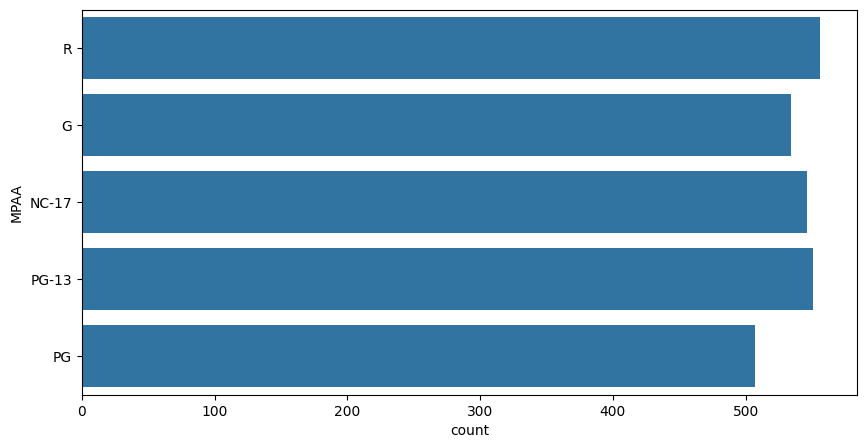

In [13]:
plt.figure(figsize=(10, 5))
sb.countplot(df['MPAA'])
plt.show()

In [14]:
df.groupby('MPAA')['domestic_revenue'].mean()

,domestic_revenue
MPAA,
G,3.426099e+07
NC-17,3.452006e+07
PG,3.697347e+07
PG-13,3.510989e+07
R,3.670206e+07


Here we can observe that the movies with PG or R ratings generally have their revenue higher than the other rating class.

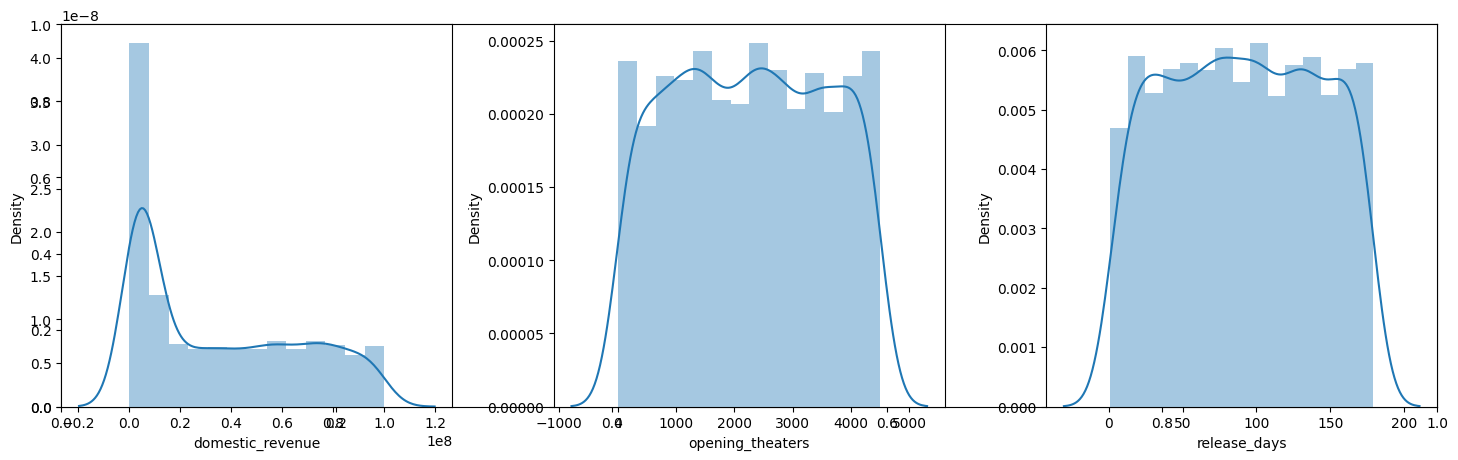

In [15]:
plt.subplots(figsize=(15, 5))

features = ['domestic_revenue', 'opening_theaters', 'release_days']
for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()

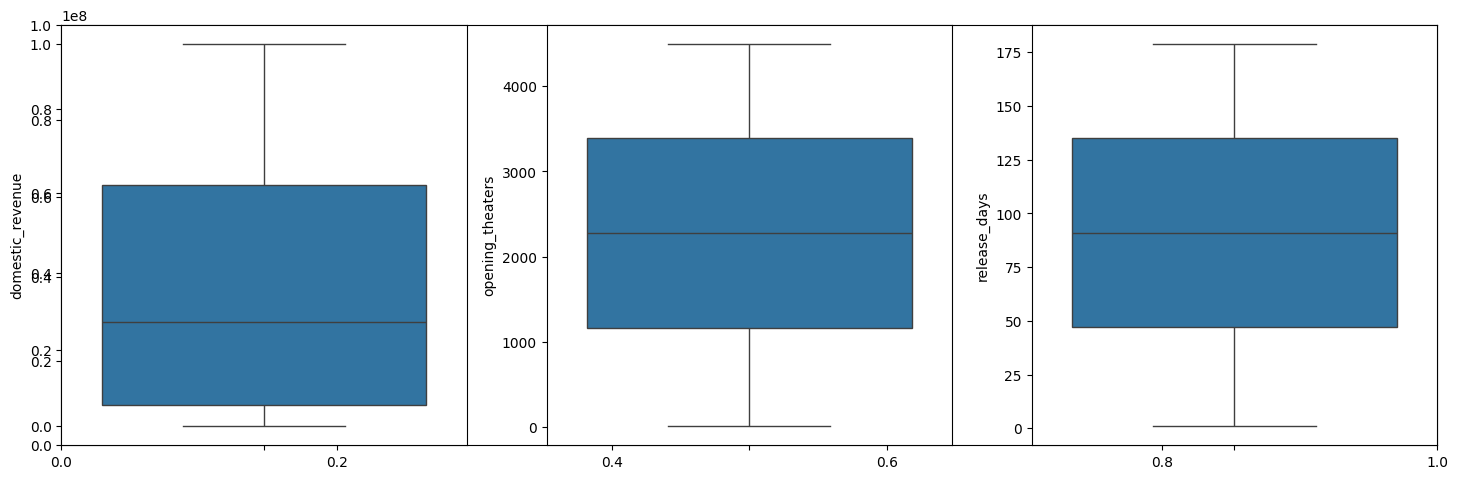

In [16]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)# 1 row, 3 columns, subplot index = i+1
    sb.boxplot(df[col])# Box plot for each feature
plt.tight_layout() #Automatically adjusts spacing between subplots to prevent overlap.
plt.show()

This code is used to visualize multiple features from a DataFrame using box plots, which are great for spotting outliers and understanding the spread of data.

Certainly, there are no outliers in the above features.

In [20]:
#This code applies a logarithmic transformation (base 10) to each value in selected columns of a DataFrame. Here's a breakdown:
for col in features:
  # Replace non-positive values with a small number before applying log transformation
  # This prevents issues with log(0) or log(negative number)
  df[col] = df[col].replace([np.inf, -np.inf], np.nan) # First, replace any existing inf with NaN
  df[col] = df[col].fillna(0) # Fill resulting NaNs with 0 (or another appropriate small positive number)
  df[col] = df[col].apply(lambda x: np.log10(x) if x > 0 else np.nan) # Apply log only to positive values

Now the data in the columns we have visualized above should be close to normal distribution.

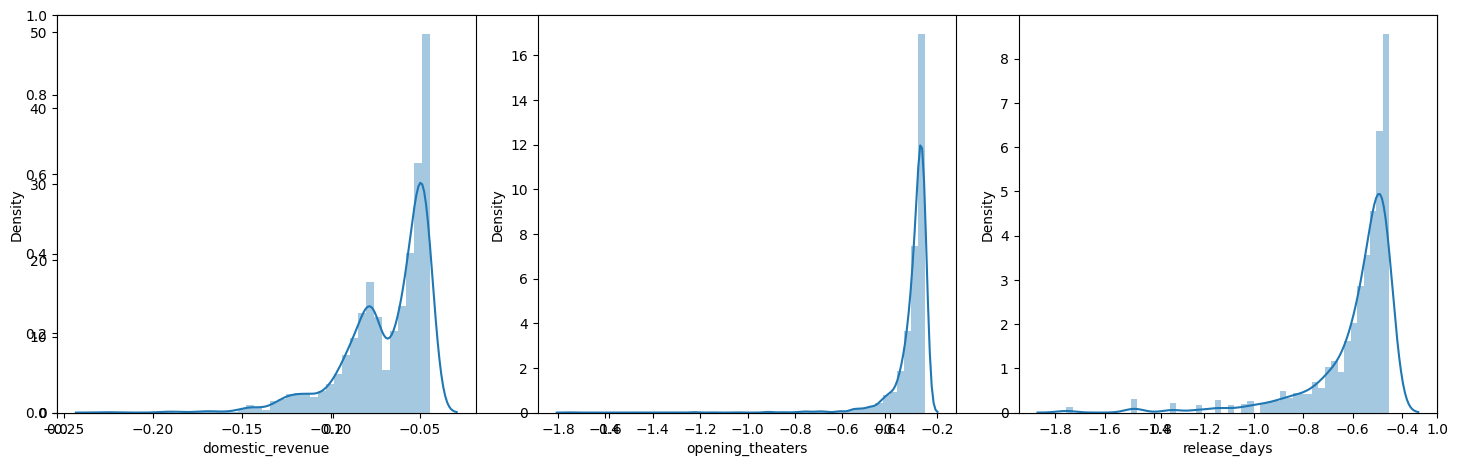

In [21]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()

# **Creating Features from the Genre**

CountVectorizer - This tool converts text data into a matrix of token counts (how many times each word appears).

**Vectorizer.transform(df['genres']) :**
Transforms the 'genres' column into a sparse matrix of word counts (or presence).

**toarray() :**  converts it into a dense NumPy array, where:

Rows = movies (or records);

Columns = genres (tokens);

Values = count of the genre (often 1 if genres are not repeated)

In [27]:
#The code is converting a text column ('genres') into individual binary or count-based columns, one for each genre — a process known as Bag-of-Words encoding

vectorizer = CountVectorizer()  #Creates an instance of CountVectorizer.
if 'genres' in df.columns:
    vectorizer.fit(df['genres']) # Fits the vectorizer to the 'genres' column in the DataFrame.(Learns the vocabulary (i.e., all unique words/genres).)
    features = vectorizer.transform(df['genres']).toarray()
    genres = vectorizer.get_feature_names_out() #Retrieves the list of genre names
    for i, name in enumerate(genres):
      df[name] = features[:, i] #Fills it with values from the features array (0 or 1/count), indicating whether that genre is present

    df.drop('genres', axis=1, inplace=True)
else:
        print("Error: 'genres' column not found in the DataFrame.")

Error: 'genres' column not found in the DataFrame.


But there will be certain genres that are not that frequent which will lead to increases in the complexity of the model unnecessarily. So, we will remove those genres which are very rare.

In [29]:
removed = 0
# Check if 'action' and 'western' columns exist before slicing
if 'action' in df.columns and 'western' in df.columns:
    for col in df.loc[:, 'action':'western'].columns:

        # Removing columns having more
        # than 95% of the values as zero.
        if (df[col] == 0).mean() > 0.95:
            removed += 1
            df.drop(col, axis=1, inplace=True)

print(removed)
print(df.shape)




0
(2694, 12)


In [30]:
for col in ['distributor', 'MPAA']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

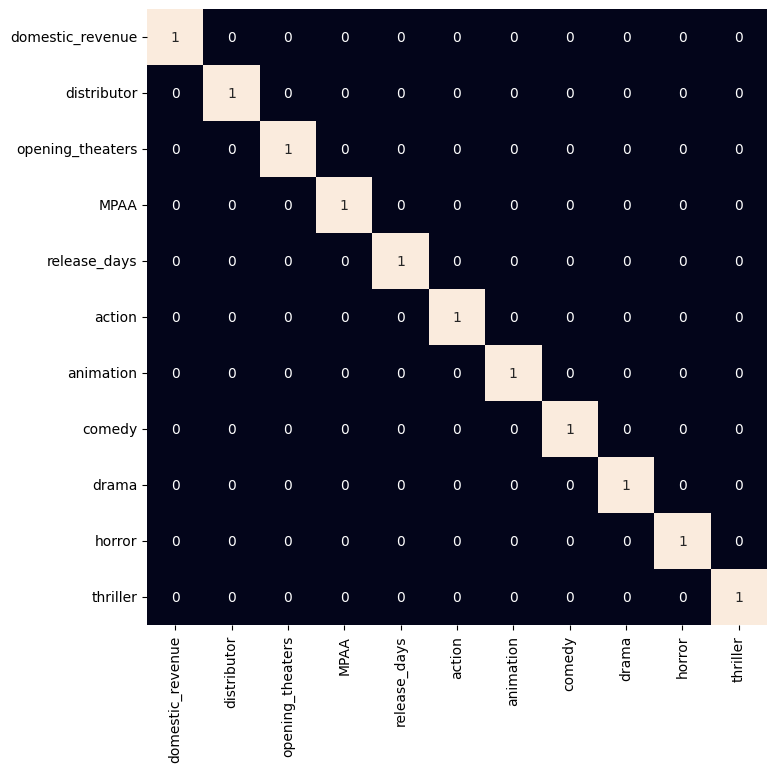

In [31]:
plt.figure(figsize=(8, 8))
sb.heatmap(df.select_dtypes(include=np.number).corr() > 0.8,
            annot=True,
            cbar=False)
plt.show()


# Model Development

Now we will separate the features and target variables and split them into training and the testing data by using which we will select the model which is performing best on the validation data.

In [32]:
features = df.drop(['title', 'domestic_revenue'], axis=1)
target = df['domestic_revenue'].values

X_train, X_val, Y_train, Y_val = train_test_split(features, target,
									test_size=0.1,
									random_state=22)
X_train.shape, X_val.shape



((2424, 10), (270, 10))

In [33]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [34]:
from sklearn.metrics import mean_absolute_error as mae
model = XGBRegressor()
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
train_preds = model.predict(X_train)
print('Training Error : ', mae(Y_train, train_preds))

val_preds = model.predict(X_val)
print('Validation Error : ', mae(Y_val, val_preds))
print()

Training Error :  0.007022451480144799
Validation Error :  0.02095790023865643



This mean absolute error value we are looking at is between the logarithm of the predicted values and the actual values so, the actual error will be higher than what we are observing above.